# bank_interest_rate

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('loan_data_train.csv')
df.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years


In [3]:
df.isna().sum()

ID                                 1
Amount.Requested                   1
Amount.Funded.By.Investors         1
Interest.Rate                      0
Loan.Length                        1
Loan.Purpose                       1
Debt.To.Income.Ratio               1
State                              1
Home.Ownership                     1
Monthly.Income                     3
FICO.Range                         0
Open.CREDIT.Lines                  4
Revolving.CREDIT.Balance           3
Inquiries.in.the.Last.6.Months     3
Employment.Length                 69
dtype: int64

In [4]:
df['ID'].nunique() # drop id colum as it have all unique values

2199

In [5]:
df.drop('ID',axis=1,inplace=True)

<AxesSubplot:>

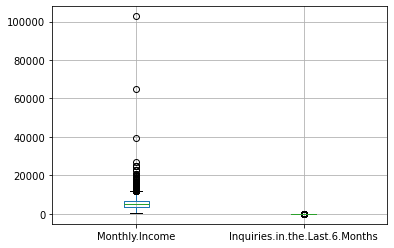

In [6]:
df.boxplot()

In [7]:
str(df.columns).replace(".",'_')

"Index(['Amount_Requested', 'Amount_Funded_By_Investors', 'Interest_Rate',\n       'Loan_Length', 'Loan_Purpose', 'Debt_To_Income_Ratio', 'State',\n       'Home_Ownership', 'Monthly_Income', 'FICO_Range', 'Open_CREDIT_Lines',\n       'Revolving_CREDIT_Balance', 'Inquiries_in_the_Last_6_Months',\n       'Employment_Length'],\n      dtype='object')"

In [8]:
df.columns

Index(['Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate',
       'Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio', 'State',
       'Home.Ownership', 'Monthly.Income', 'FICO.Range', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months',
       'Employment.Length'],
      dtype='object')

In [9]:
df.rename(columns={'Amount.Requested':'Amount_Requested', 
                   'Amount.Funded.By.Investors':'Amount_Funded_By_Investors', 
                   'Interest.Rate':'Interest_Rate',
       'Loan.Length':'Loan_Length', 'Loan.Purpose':'Loan_Purpose', 
                   'Debt.To.Income.Ratio':'Debt_To_Income_Ratio',
                   'State':'State','Home.Ownership':'Home_Ownership',
                   'Monthly.Income':'Monthly_Income',
                   'FICO.Range':'FICO_Range', 
                   'Open.CREDIT.Lines':'Open_CREDIT_Lines',
                   'Revolving.CREDIT.Balance':'Revolving_CREDIT_Balance',
                   'Inquiries.in.the.Last.6.Months':'Inquiries_in_the_Last_6_Months',
                   'Employment.Length':'Employment_Length'},inplace=True)

In [10]:
df.columns

Index(['Amount_Requested', 'Amount_Funded_By_Investors', 'Interest_Rate',
       'Loan_Length', 'Loan_Purpose', 'Debt_To_Income_Ratio', 'State',
       'Home_Ownership', 'Monthly_Income', 'FICO_Range', 'Open_CREDIT_Lines',
       'Revolving_CREDIT_Balance', 'Inquiries_in_the_Last_6_Months',
       'Employment_Length'],
      dtype='object')

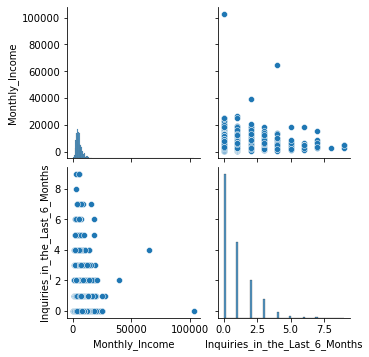

In [11]:
sns.pairplot(df)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2199 non-null   object 
 1   Amount_Funded_By_Investors      2199 non-null   object 
 2   Interest_Rate                   2200 non-null   object 
 3   Loan_Length                     2199 non-null   object 
 4   Loan_Purpose                    2199 non-null   object 
 5   Debt_To_Income_Ratio            2199 non-null   object 
 6   State                           2199 non-null   object 
 7   Home_Ownership                  2199 non-null   object 
 8   Monthly_Income                  2197 non-null   float64
 9   FICO_Range                      2200 non-null   object 
 10  Open_CREDIT_Lines               2196 non-null   object 
 11  Revolving_CREDIT_Balance        2197 non-null   object 
 12  Inquiries_in_the_Last_6_Months  21

In [13]:
df.describe()

,Monthly_Income,Inquiries_in_the_Last_6_Months
count,2197.000000,2197.000000
mean,5727.459290,0.898498
std,4073.529708,1.219223
min,588.500000,0.000000
25%,3458.000000,0.000000
50%,5000.000000,0.000000
75%,6883.330000,1.000000
max,102750.000000,9.000000


### Amount_Requested

In [14]:
df['Amount_Requested'].value_counts()

10000    178
12000    132
5000      96
20000     92
6000      89
        ... 
9525       1
1950       1
15300      1
11950      1
13225      1
Name: Amount_Requested, Length: 356, dtype: int64

In [15]:
df['Amount_Requested'].unique()

array(['25000', '19750', '2100', '28000', '24250', '5400', '16000',
       '6400', '24000', '8000', '9000', '13000', '10000', '3600', '7350',
       '17000', '18825', '4200', '5000', '3700', '6625', '15000', '29175',
       '6000', '22000', '18000', '12000', '6500', '4000', '7300', '19400',
       '11625', '3000', '19000', '2500', '17350', '21000', '20000',
       '1900', '23300', '8400', '1600', '7200', '15400', '7000', '20500',
       '24375', '5875', '14000', '5500', '4800', '34500', '20950', '7500',
       '14400', '14675', '24500', '35000', '11200', '30000', '3200',
       '11700', '11500', '8500', '16500', '16550', '13250', '5200',
       '2000', '4500', '20800', '8325', '6600', '7750', '19500', '27050',
       '8800', '11000', '3500', '21200', '2650', '8575', '13200', '10750',
       '5450', '2400', '15300', '17325', '19125', '19075', '5600',
       '10400', '16450', '11325', '10050', '14725', '16750', '4325',
       '10075', '10800', '23500', '6200', '2875', '27825', '12250',
 

In [16]:
df['Amount_Requested'].isna().sum()

1

In [17]:
df['Amount_Requested'].loc[df['Amount_Requested']=='.']

371     .
1357    .
1791    .
1991    .
Name: Amount_Requested, dtype: object

In [18]:
df.replace('.',np.nan,inplace=True)

In [19]:
df['Amount_Requested'].isna() .sum()

5

In [20]:
df['Amount_Requested']=df['Amount_Requested'].astype('float')

In [21]:
df['Amount_Requested'].dtype

dtype('float64')

In [22]:
df['Amount_Requested'].mean()

12496.469248291573

In [23]:
df['Amount_Requested'].mode()[0]

10000.0

In [24]:
df['Amount_Requested'].median()

10000.0

In [25]:
df['Amount_Requested'].fillna(df['Amount_Requested'].median(),inplace=True)

<AxesSubplot:xlabel='Amount_Requested'>

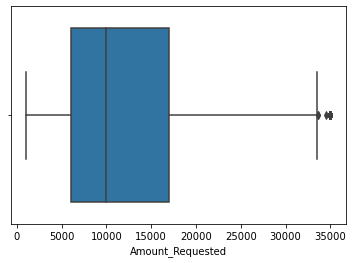

In [26]:
sns.boxplot(df['Amount_Requested'])

In [27]:
iqr=df['Amount_Requested'].quantile(0.75)-df['Amount_Requested'].quantile(0.25)
upper_limit=df['Amount_Requested'].quantile(0.75)+2*iqr
print("IQR",iqr)
print("upper limit",upper_limit)

IQR 11000.0
upper limit 39000.0


In [28]:
df['Amount_Requested'].loc[df['Amount_Requested']>upper_limit]

Series([], Name: Amount_Requested, dtype: float64)

In [29]:
# df.info()

### Amount_Funded_By_Investors

In [30]:
df['Amount_Funded_By_Investors'].dtype

dtype('O')

In [31]:
df['Amount_Funded_By_Investors'].isna().sum()

4

In [32]:
df['Amount_Funded_By_Investors']=df['Amount_Funded_By_Investors'].astype('float')

In [33]:
df['Amount_Funded_By_Investors'].mean()

12077.803406193085

In [34]:
df['Amount_Funded_By_Investors'].mode()

0    10000.0
Name: Amount_Funded_By_Investors, dtype: float64

In [35]:
df['Amount_Funded_By_Investors'].median()

10000.0

In [36]:
df['Amount_Funded_By_Investors'].fillna(df['Amount_Funded_By_Investors'].median(),inplace=True)

<AxesSubplot:xlabel='Amount_Funded_By_Investors'>

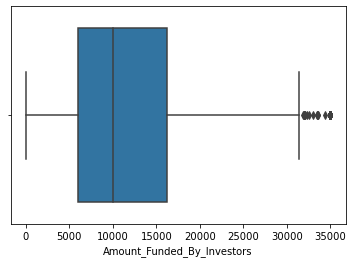

In [37]:
sns.boxplot(df['Amount_Funded_By_Investors'])

In [38]:
iqr=df['Amount_Funded_By_Investors'].quantile(0.75)-df['Amount_Funded_By_Investors'].quantile(0.25)
upper_limit=df['Amount_Funded_By_Investors'].quantile(0.75)+3*iqr
print("IQR",iqr)
print("upper limit",upper_limit)

IQR 10200.0
upper limit 46800.0


In [39]:
df['Amount_Funded_By_Investors'].loc[df['Amount_Funded_By_Investors']>upper_limit]

Series([], Name: Amount_Funded_By_Investors, dtype: float64)

In [40]:
# Interest_Rate >>>>>> target column

In [41]:
df['Interest_Rate'].dtype

dtype('O')

In [42]:
df['Interest_Rate']

0       18.49%
1       17.27%
2       14.33%
3       16.29%
4       12.23%
         ...  
2195    23.28%
2196    14.33%
2197    15.31%
2198    20.99%
2199    10.16%
Name: Interest_Rate, Length: 2200, dtype: object

In [43]:
df['Interest_Rate']=df["Interest_Rate"].str.replace("%","")

In [44]:
df['Interest_Rate']=df['Interest_Rate'].astype('float') 

In [45]:
df['Interest_Rate'].isna().sum()

0

In [46]:
# df.info()

### Loan_Length

In [47]:
df['Loan_Length'].value_counts().to_dict()

{'36 months': 1722, '60 months': 476}

In [48]:
df['Loan_Length'].replace({'36 months': 36, '60 months': 60},inplace=True)

<AxesSubplot:xlabel='Loan_Length', ylabel='count'>

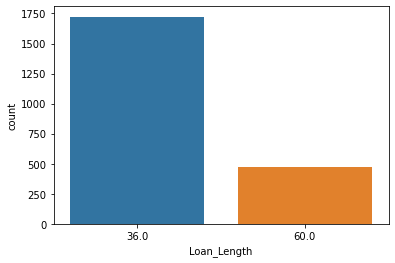

In [49]:
sns.countplot(df['Loan_Length'])

### Loan_Purpose

In [50]:
df['Loan_Purpose'].value_counts()

debt_consolidation    1147
credit_card            394
other                  174
home_improvement       135
major_purchase          84
small_business          80
car                     45
wedding                 35
medical                 26
moving                  25
house                   19
vacation                18
educational             14
renewable_energy         3
Name: Loan_Purpose, dtype: int64

In [70]:
df_Loan_Purpose=pd.get_dummies(df['Loan_Purpose'])
df.drop('Loan_Purpose',axis=1,inplace=True)
df_Loan_Purpose

,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2196,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2197,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2198,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [72]:
# df.info()

### Debt_To_Income_Ratio

In [77]:
df['Debt_To_Income_Ratio'].nunique()

1526

In [78]:
df['Debt_To_Income_Ratio'].dtype

dtype('O')

In [79]:
df['Debt_To_Income_Ratio']=df["Debt_To_Income_Ratio"].str.replace("%","")

In [81]:
df['Debt_To_Income_Ratio']=df['Debt_To_Income_Ratio'].astype('float')

In [82]:
df['Debt_To_Income_Ratio'].dtype

dtype('float64')

<AxesSubplot:xlabel='Debt_To_Income_Ratio'>

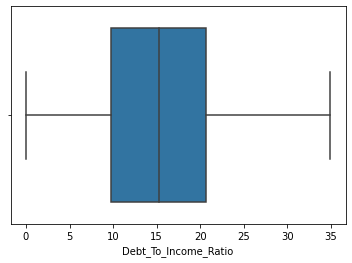

In [83]:
sns.boxplot(df['Debt_To_Income_Ratio'])

In [92]:
df=pd.concat(df,df_Loan_Purpose,axis=1)
df

TypeError: concat() got multiple values for argument 'axis'